In [1]:
# imports
import re
import os
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# get min, max, madian for each string colomn and plot histogram and boxplot
def visualize_text(dataset , col_name, target):
  # Calculate the average length of each document
  doc_lengths = dataset[col_name].apply(len)
  avg_doc_length = doc_lengths.mean()

  # Determine the minimum, maximum, and median lengths of the documents
  min_doc_length = doc_lengths.min()
  max_doc_length = doc_lengths.max()
  median_doc_length = doc_lengths.median()

  print(f"Average document length for ner data : {avg_doc_length:.2f} characters")

  # Min, max, and median length of documents
  print(f"Min {target} length: {min_doc_length} characters")
  print(f"Max {target} length: {max_doc_length} characters")
  print(f"Median {target} length: {median_doc_length} characters")
  print("-------------------------------------------------------------------------")

  # Plot boxplots of document lengths and hypothesis lengths
  plt.hist(doc_lengths, bins=50)
  # Set labels and title
  plt.title(f"Distribution of {target} Lengths")
  plt.xlabel(f"{target} Length (characters)")
  plt.ylabel("Count")
  # Display the plot
  plt.show()

 # Create a figure and axis
  fig, ax = plt.subplots()
  # Plot boxplots of document and hypothesis lengths
  ax.boxplot(doc_lengths)
  # Set labels and title
  ax.set_xlabel(f'{col_name} Type')
  ax.set_ylabel('Length')
  ax.set_title(f'Distribution of {target} Lengths')
  # Display the plot
  plt.show()

In [12]:
# visualize_label using bar chart and pie chart
def visualize_label(dataset):
  print(f"Visualize labels for the ner_data")
  label_counts = dataset['label'].value_counts()
  print("The labels and corresponding counts\n",label_counts)

  # Create a bar chart to visualize the label distribution
  plt.bar(label_counts.index, label_counts.values)
  # Display the plot
  plt.show()


  # Count the occurrences of each label
  label_counts = {}
  for label in dataset['label']:
      if label in label_counts:
        label_counts[label] += 1
      else:
        label_counts[label] = 1
  # Get the labels and corresponding counts
  labels = list(label_counts.keys())
  counts = list(label_counts.values())
  # Create a figure and axis
  fig, ax = plt.subplots()
  # Plot the pie chart
  ax.pie(counts, labels=labels, autopct='%1.1f%%')
  # Set title
  ax.set_title('Label Distribution')
  # Display the chart
  plt.show()


In [2]:
# Read the dataset from the CSV file
file_path = '/content/ner_data.csv'  # Replace with the actual path to your CSV file
df = pd.read_csv(file_path)
# display a concise summary of the DataFrame df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5030 entries, 0 to 5029
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5030 non-null   object
 1   label   5030 non-null   object
dtypes: object(2)
memory usage: 78.7+ KB


In [3]:
# print the data and its shape
df

,text,label
0,عايزة احط عنوان بيتي,X X X X
1,ابغى الفاتورة من فضلك,X X X X
2,عايزة اغير عنوان البيت,X X X X
3,ممكن اغير عنواني,X X X
4,عايز منيو ارابياتا جامعة الدول,X X X X X
...,...,...
5025,ضيف على الاوردر 3 بيج ماك كومبو لارج,X X X itemnumber ItemName ItemName X ItemSize
5026,حضرتك ممكن تغيرلي الرقم المتسجل عندكم,X X X X X X
5027,وش هي طريقة حذف الجوال القديم,X X X X X X
5028,فاضل قداش وقت عالاوردر,X X X X


In [4]:
# provides a statistical summary of the DataFrame df
df.describe(include='all')

,text,label
count,5030,5030
unique,4565,386
top,بلكي اسأل عن شي,X X X X
freq,5,1169


In [6]:
# display the last few rows of the DataFrame df
df.tail()

,text,label
5025,ضيف على الاوردر 3 بيج ماك كومبو لارج,X X X itemnumber ItemName ItemName X ItemSize
5026,حضرتك ممكن تغيرلي الرقم المتسجل عندكم,X X X X X X
5027,وش هي طريقة حذف الجوال القديم,X X X X X X
5028,فاضل قداش وقت عالاوردر,X X X X
5029,شحو ؤقم جوالي الجديد,X X X X


Average document length for ner data : 23.68 characters
Min sentence length: 2 characters
Max sentence length: 89 characters
Median sentence length: 23.0 characters
-------------------------------------------------------------------------


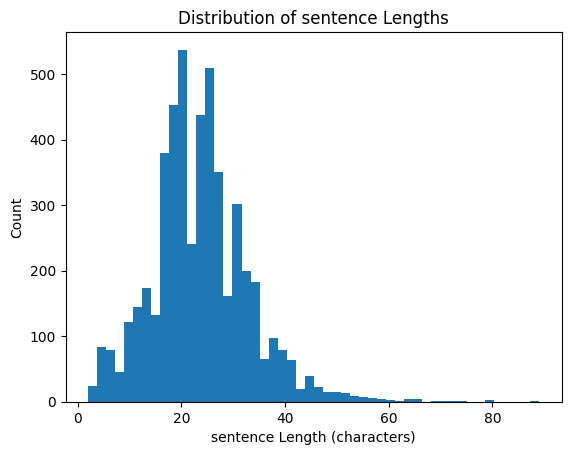

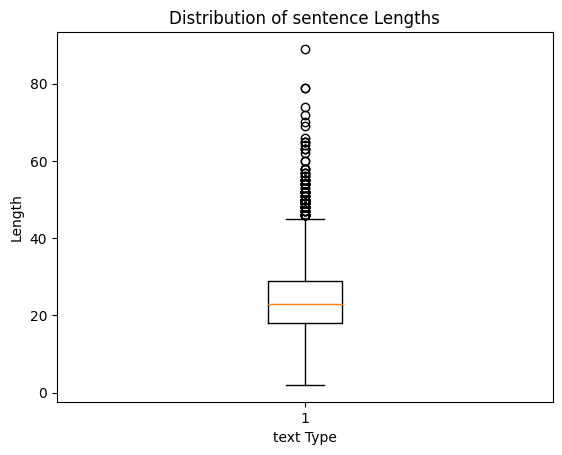

In [11]:
visualize_text(df , 'text', 'sentence')

Visualize labels for the ner_data
The labels and corresponding counts
 X X X X                                                       1169
X X X X X                                                      752
X X X                                                          669
X X X X X X                                                    436
X X                                                            309
                                                              ... 
X X X phone X X X X                                              1
Exclude X                                                        1
X X ItemName ItemName ItemName X                                 1
X PredefinedMealName PredefinedMealName PredefinedMealName       1
X X X itemnumber ItemName ItemName X ItemSize                    1
Name: label, Length: 386, dtype: int64


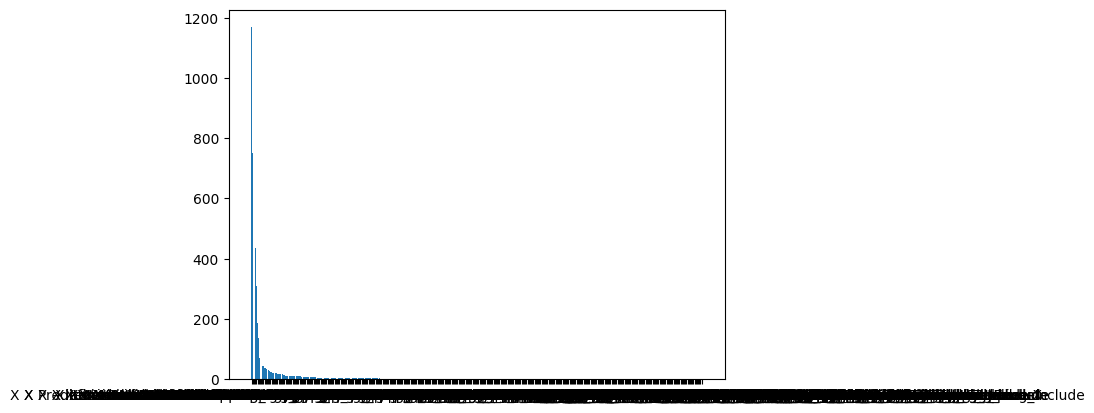

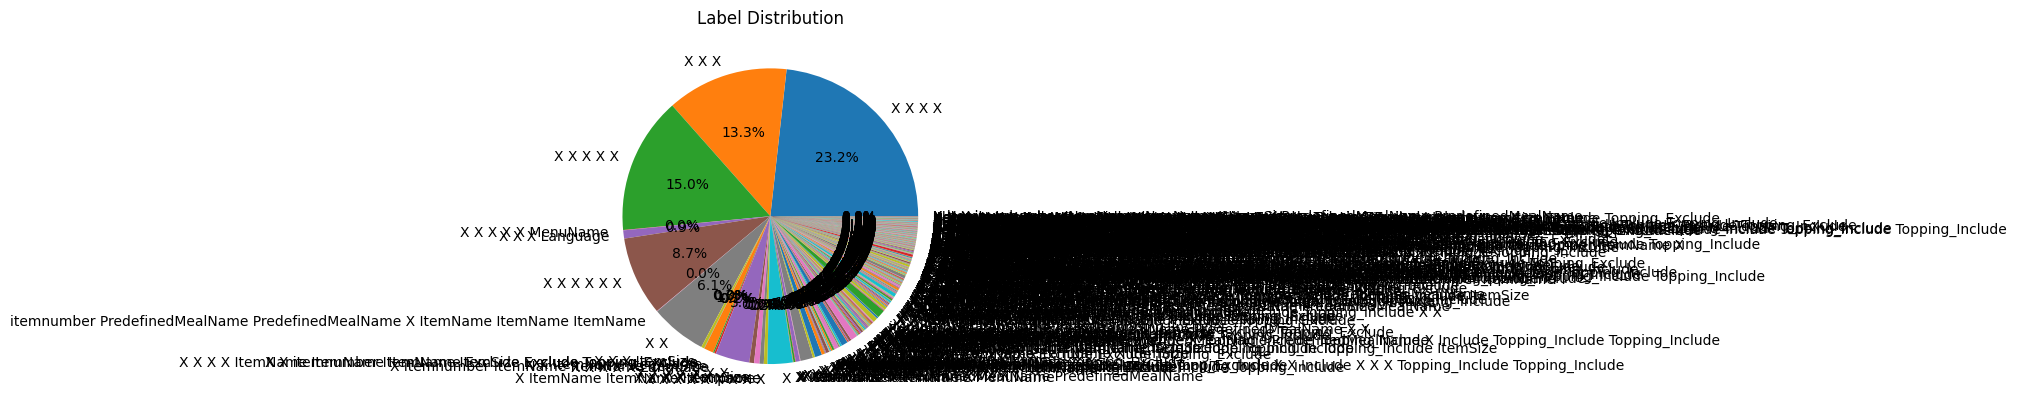

In [14]:
visualize_label(df)

In [15]:
# Create a DataFrame to store the word-label pairs
word_label_df = pd.DataFrame(columns=['Word', 'label'])

# Process the dataset
for _, row in df.iterrows():
    words = row['text'].split()
    # Convert 'label' to a string before splitting
    labels = row['label'].split()
    word_label_pairs = list(zip(words, labels))
    word_label_df = word_label_df.append(pd.DataFrame(word_label_pairs, columns=['Word', 'label']), ignore_index=True)

# Save the DataFrame to a CSV file
word_label_df.to_csv('word_label_pairs.csv', index=False)

# Read the dataset from the CSV file
word_label_pairs_path = '/content/word_label_pairs.csv'  # Replace with the actual path to your CSV file
word_label_pairs = pd.read_csv(word_label_pairs_path)
word_label_pairs.info()

Streaming output truncated to the last 5000 lines.
<ipython-input-15-7eda421b07d4>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word_label_df = word_label_df.append(pd.DataFrame(word_label_pairs, columns=['Word', 'label']), ignore_index=True)
<ipython-input-15-7eda421b07d4>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word_label_df = word_label_df.append(pd.DataFrame(word_label_pairs, columns=['Word', 'label']), ignore_index=True)
<ipython-input-15-7eda421b07d4>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word_label_df = word_label_df.append(pd.DataFrame(word_label_pairs, columns=['Word', 'label']), ignore_index=True)
<ipython-input-15-7eda421b07d4>:10: FutureWarning: The frame.append method is deprecated an

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22525 entries, 0 to 22524
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Word    22525 non-null  object
 1   label   22525 non-null  object
dtypes: object(2)
memory usage: 352.1+ KB


<ipython-input-15-7eda421b07d4>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word_label_df = word_label_df.append(pd.DataFrame(word_label_pairs, columns=['Word', 'label']), ignore_index=True)
<ipython-input-15-7eda421b07d4>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word_label_df = word_label_df.append(pd.DataFrame(word_label_pairs, columns=['Word', 'label']), ignore_index=True)
<ipython-input-15-7eda421b07d4>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word_label_df = word_label_df.append(pd.DataFrame(word_label_pairs, columns=['Word', 'label']), ignore_index=True)
<ipython-input-15-7eda421b07d4>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. 

Average document length for ner data : 4.51 characters
Min sentence length: 1 characters
Max sentence length: 20 characters
Median sentence length: 4.0 characters
-------------------------------------------------------------------------


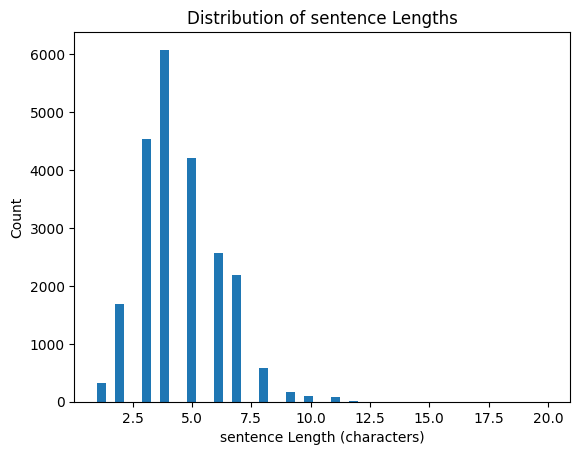

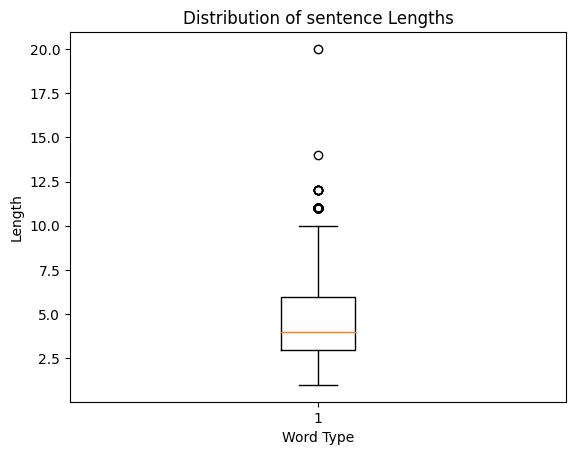

In [19]:
visualize_text(word_label_pairs,'Word','sentence')

Visualize labels for the ner_data
The labels and corresponding counts
 X                     19465
ItemName               1309
itemnumber              257
ItemSize                237
Topping_Include         226
Include                 174
PredefinedMealName      163
Language                151
MenuName                123
phone                   121
Exclude                 114
Topping_Exclude          98
OrderNumber              87
Name: label, dtype: int64


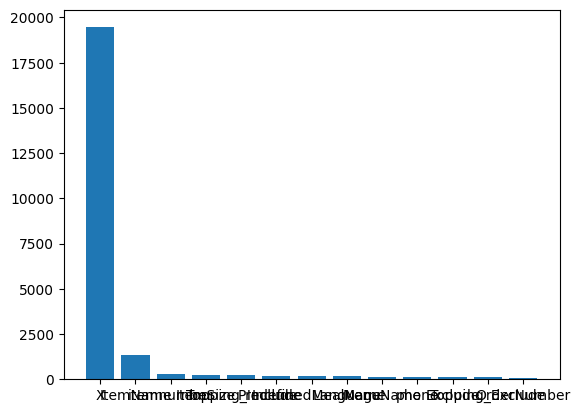

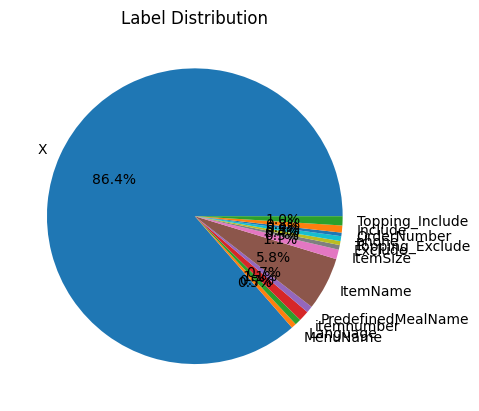

In [20]:
visualize_label(word_label_pairs)

Average document length for ner data : 4.92 characters
Min label length: 1 characters
Max label length: 14 characters
Median label length: 5.0 characters
-------------------------------------------------------------------------


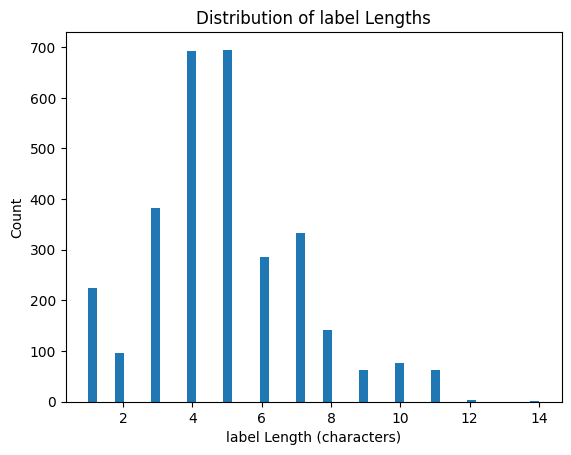

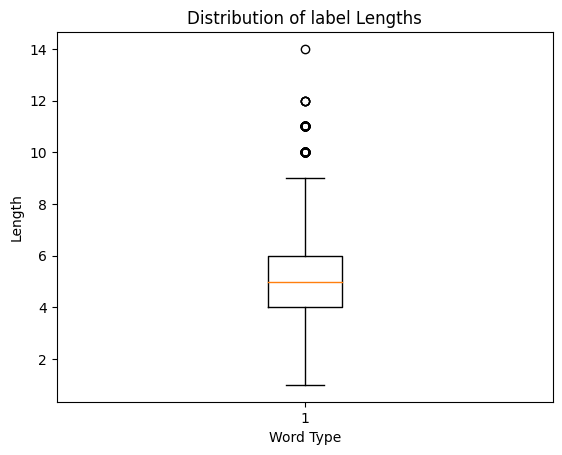

Visualize labels for the ner_data
The labels and corresponding counts
 ItemName              1309
itemnumber             257
ItemSize               237
Topping_Include        226
Include                174
PredefinedMealName     163
Language               151
MenuName               123
phone                  121
Exclude                114
Topping_Exclude         98
OrderNumber             87
Name: label, dtype: int64


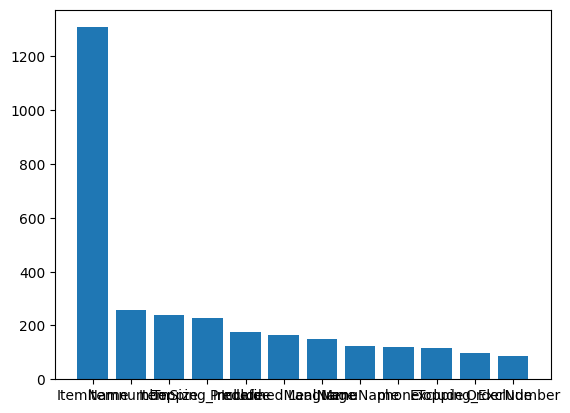

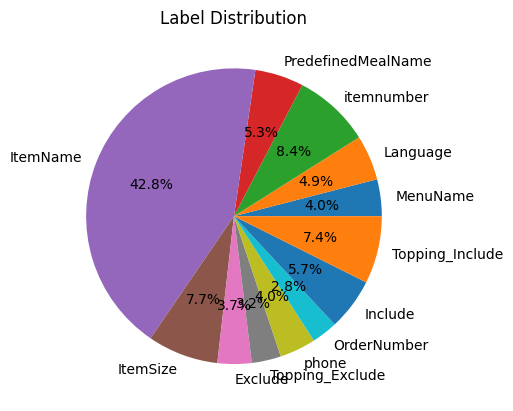

In [21]:
word_label_pairs_drop_x= word_label_pairs[word_label_pairs['label'] != 'X']
visualize_text(word_label_pairs_drop_x,'Word','label')
visualize_label(word_label_pairs_drop_x)


In [22]:
# Clean/Normalize Arabic Text
def clean_str(text):
    search = ["أ", "إ", "آ", "ة", "_", "-", "/", ".", "،", " و ", " يا ", '"', "ـ", "'", "ى", "\\", '\n', '\t', '&quot;',
              '?', '؟', '!']
    replace = ["ا", "ا", "ا", "ه", " ", " ", "", "", "", " و", " يا", "", "", "", "ي", '', ' ', ' ', ' ', ' ? ', ' ؟ ',
               ' ! ']

    # Remove tashkeel
    p_tashkeel = re.compile(r'[\u0617-\u061A\u064B-\u0652]')
    text = re.sub(p_tashkeel, "", text)

    # Remove longation
    p_longation = re.compile(r'(.)\1+')
    subst = r"\1\1"
    text = re.sub(p_longation, subst, text)

    text = text.replace('وو', 'و')
    text = text.replace('يي', 'ي')
    text = text.replace('اا', 'ا')

    for i in range(0, len(search)):
        text = text.replace(search[i], replace[i])

    # Trim
    text = text.strip()

    return text

def re_clean(old_sentence, old_tags):
    space_regex = re.compile("\s+")
    new_sentence = []
    new_tags = []

    # Ensure that the lengths match
    min_length = min(len(old_sentence), len(old_tags))

    for j in range(min_length):
        # add word if not empty and doesn't contain spaces only
        if old_sentence[j]!="" and space_regex.match(old_sentence[j])==None:
            new_sentence.append(old_sentence[j])
            new_tags.append(old_tags[j])

    return new_sentence, new_tags


In [23]:
sentences = []
tags = []
vocab = set()

# Process each row in the DataFrame
for index, row in df.iterrows():
    sentence = clean_str(row['text'])
    entities = row['label'].split()
    entities = [entity for entity in entities if entity is not None]  # Remove None values
    vocab.update(sentence.split())
    recleaned = re_clean(sentence.split(), entities)
    sentences.append(recleaned[0].copy())
    tags.append(recleaned[1].copy())

print('Done [Sentences:', len(sentences), ', Tags:', len(tags), ', Unique Words:', len(vocab))
df

Done [Sentences: 5030 , Tags: 5030 , Unique Words: 2385


,text,label
0,عايزة احط عنوان بيتي,X X X X
1,ابغى الفاتورة من فضلك,X X X X
2,عايزة اغير عنوان البيت,X X X X
3,ممكن اغير عنواني,X X X
4,عايز منيو ارابياتا جامعة الدول,X X X X X
...,...,...
5025,ضيف على الاوردر 3 بيج ماك كومبو لارج,X X X itemnumber ItemName ItemName X ItemSize
5026,حضرتك ممكن تغيرلي الرقم المتسجل عندكم,X X X X X X
5027,وش هي طريقة حذف الجوال القديم,X X X X X X
5028,فاضل قداش وقت عالاوردر,X X X X


Average document length for ner data : 23.68 characters
Min sentence length: 2 characters
Max sentence length: 89 characters
Median sentence length: 23.0 characters
-------------------------------------------------------------------------


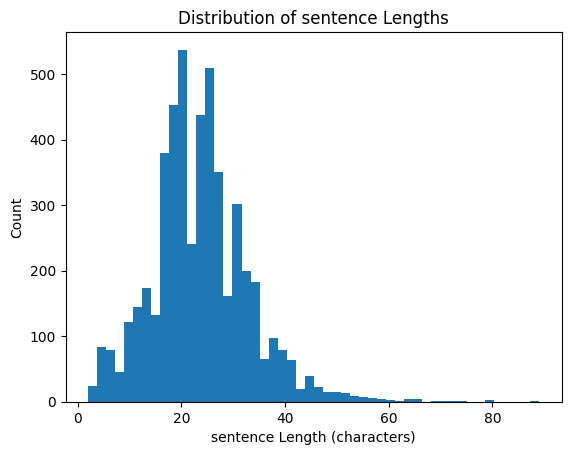

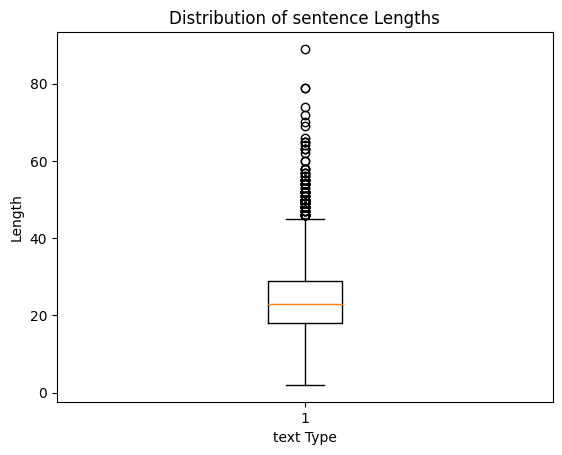

In [25]:
visualize_text(df,'text','sentence')

In [24]:
# Make a mapping betwween words and their IDs
word2id = {word:id for  id, word in enumerate(vocab)}
id2word = {id:word for  id, word in enumerate(vocab)}

**The unbalanced dataset problem**

I found that:
Average document length for ner data : 23.68 words
Min sentence length: 2 words
Max sentence length: 89 words
Median sentence length: 23.0 words
----
I re-cleaned the sentences again and removed all empty words and strings that contain spaces only. It made slight difference but it wasn't enough.

Results:
- Average document length for ner data : 23.68 characters
- Min sentence length: 2 words
- Max sentence length: 89 words
- Median sentence length: 23.0 words

----
Next step is to choose another padding size, I think size of 30 would be best as most sentences are 30 words or less.

In [26]:
from tensorflow.keras.utils import to_categorical

# Sentence encoder
def encode_sentence(old_sentence):
  encoded_sentence = []
  for word in old_sentence:
    try:
      encoded_sentence.append(word2id[word])
    except KeyError:
      encoded_sentence.append(0) # A dummy digit for out of vocab

  return encoded_sentence

# Encode Tags
tags_encoding = {
    'X':0,
    'ItemName':1,
    'itemnumber':2,
    'ItemSize':3,
    'Topping_Include':4,
    'Include':5,
    'PredefinedMealName':6,
    'Language':7,
    'MenuName':8,
    'phone':9,
    'Exclude':10,
    'Topping_Exclude':11,
    'OrderNumber':12,

  }


def encode_tags(old_tags):
  new_tags = [tags_encoding[tag] for tag in old_tags]
  new_tags = to_categorical(y = new_tags, num_classes=13)
  return new_tags

In [27]:
# Encoding
sentences_encoded = []
tags_encoded = []

for i in range(len(sentences)):
  sentences_encoded.append(encode_sentence(sentences[i]))
  tags_encoded.append(encode_tags(tags[i]))

In [29]:
from keras.preprocessing.sequence import pad_sequences

# Padding
MAX_SEQUENCE_LENGTH = 40

sentences_padded = pad_sequences(sequences = sentences_encoded,
                                 maxlen=MAX_SEQUENCE_LENGTH,
                                 dtype='int32',
                                 padding='post',
                                 truncating='post',
                                 value = 0)
tags_padded = pad_sequences(sequences = tags_encoded,
                                 maxlen=MAX_SEQUENCE_LENGTH,
                                 dtype='int32',
                                 padding='post',
                                 truncating='post',
                                 value = np.array([0., 0., 0., 0., 0., 0., 0., 0.,0., 0., 0., 0.,1.]))

In [30]:
from sklearn.model_selection import train_test_split

# Splitting data
train_sentences, test_sentences, train_labels, test_labels = train_test_split(sentences_padded,
                                                                              tags_padded,                                                                          train_size=0.8,
                                                                              random_state=42)

In [ ]:
# Sentence decoder
def decode_sentence(encoded_sentence):
    decoded_sentence = [id2word[idx] for idx in encoded_sentence]
    return decoded_sentence

# Example usage
encoded_sentence = [1, 4, 2, 3, 5]
decoded_sentence = decode_sentence(encoded_sentence)
print(decoded_sentence)


In [31]:
# Download AraVec (Word2Vec Model) by Abu Bakr Soliman, Kareem Eissa, and Samhaa R.El-Beltagy.
! wget "https://archive.org/download/aravec2.0/wiki_cbow_300.zip"
! unzip "/content/wiki_cbow_300.zip" -d "/content/word2vec_model"

--2024-01-25 23:39:59--  https://archive.org/download/aravec2.0/wiki_cbow_300.zip
Resolving archive.org (archive.org)... 207.241.224.2
Connecting to archive.org (archive.org)|207.241.224.2|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ia903107.us.archive.org/0/items/aravec2.0/wiki_cbow_300.zip [following]
--2024-01-25 23:40:00--  https://ia903107.us.archive.org/0/items/aravec2.0/wiki_cbow_300.zip
Resolving ia903107.us.archive.org (ia903107.us.archive.org)... 207.241.232.147
Connecting to ia903107.us.archive.org (ia903107.us.archive.org)|207.241.232.147|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 364888893 (348M) [application/zip]
Saving to: ‘wiki_cbow_300.zip’

wiki_cbow_300.zip   100%[===================>] 347.98M   494KB/s    in 17m 22s 

2024-01-25 23:57:22 (342 KB/s) - ‘wiki_cbow_300.zip’ saved [364888893/364888893]

Archive:  /content/wiki_cbow_300.zip
  inflating: /content/word2vec_model/wikipedia_cbow_300  
 

In [32]:
import gensim

# Load the Word2Vec model
weights_path = "/content/word2vec_model/wikipedia_cbow_300"
araVec = gensim.models.Word2Vec.load(weights_path)

# Testing
most_similar = araVec.wv.most_similar( "بيتزا" )
for term, score in most_similar:
	print(term, score)

برغر 0.6909424066543579
هت 0.6821909546852112
ستيك 0.6436734795570374
ارماني 0.6419699192047119
وبوب 0.6346971392631531
ميني 0.6327617764472961
فاير 0.6318188905715942
دوغ 0.6289014220237732
برجر 0.628822386264801
تيفاني 0.6237741708755493


In [42]:
# Choose a fixed embed_size
embed_size = 300

# Create an embedding matrix for the embedding layer
num_words = len(vocab)
embedding_matrix = np.zeros(shape=(num_words, embed_size))

for word, id in word2id.items():
    try:
        embedding_matrix[id] = araVec.wv[word]
    except KeyError:
        # Handle out-of-vocabulary words
        embedding_matrix[id] = np.zeros(embed_size)

embedding_matrix.shape


(2385, 300)

In [46]:
from tensorflow.keras.layers import LSTM, Input, Dense, Embedding, TimeDistributed
from tensorflow.keras.models import Model, Sequential

tf.keras.backend.clear_session() # Makes sure old model was deleted if exists

lstm_model = Sequential()
# Adding Layers
lstm_model.add(Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32'))
lstm_model.add(Embedding(input_dim = len(vocab),              # Vocabulary Size (number of unique words for training)
                        output_dim = embed_size,              # Length of the vector for each word (embedding dimension)
                        input_length = MAX_SEQUENCE_LENGTH,   # Maximum length of a sequence
                        weights = [embedding_matrix],         # Send the needed AraVec Weights
                        trainable = False))

lstm_model.add(LSTM(units = embed_size,
                    return_sequences=True,
                    dropout=0.2,
                    recurrent_dropout=0.2))
lstm_model.add(Dense(units = 256,
                    activation='relu'))

lstm_model.add(Dense(13, activation='softmax'))

# Compile the model
lstm_model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 40, 300)           715500    
                                                                 
 lstm (LSTM)                 (None, 40, 300)           721200    
                                                                 
 dense (Dense)               (None, 40, 256)           77056     
                                                                 
 dense_1 (Dense)             (None, 40, 13)            3341      
                                                                 
Total params: 1517097 (5.79 MB)
Trainable params: 801597 (3.06 MB)
Non-trainable params: 715500 (2.73 MB)
_________________________________________________________________


In [49]:
lstm_model.fit(train_sentences,
               train_labels,
               validation_split=0.2,
               batch_size = 20,
               epochs = 5)

Epoch 1/5
161/161 [==============================] - 73s 451ms/step - loss: 0.0163 - accuracy: 0.9951 - val_loss: 0.0242 - val_accuracy: 0.9930
Epoch 2/5
161/161 [==============================] - 71s 441ms/step - loss: 0.0150 - accuracy: 0.9953 - val_loss: 0.0259 - val_accuracy: 0.9928
Epoch 3/5
161/161 [==============================] - 71s 442ms/step - loss: 0.0143 - accuracy: 0.9954 - val_loss: 0.0252 - val_accuracy: 0.9929
Epoch 4/5
161/161 [==============================] - 71s 437ms/step - loss: 0.0138 - accuracy: 0.9956 - val_loss: 0.0270 - val_accuracy: 0.9928
Epoch 5/5
161/161 [==============================] - 69s 430ms/step - loss: 0.0130 - accuracy: 0.9959 - val_loss: 0.0270 - val_accuracy: 0.9934


In [50]:
lstm_model.evaluate(test_sentences, test_labels)

32/32 [==============================] - 5s 142ms/step - loss: 0.0227 - accuracy: 0.9941


[0.022709837183356285, 0.9941103458404541]

In [51]:
import numpy as np

tags_scores = {
    'X': 0,
    'ItemName': 0,
    'itemnumber': 0,
    'ItemSize': 0,
    'Topping_Include': 0,
    'Include': 0,
    'PredefinedMealName': 0,
    'Language': 0,
    'MenuName': 0,
    'phone': 0,
    'Exclude': 0,
    'Topping_Exclude': 0,
    'OrderNumber': 0,
}

# Define the unique tags
unique_tags = list(tags_scores.keys())

# Create a dictionary of one-hot encoded arrays
tags_onehot = {tag: np.eye(len(unique_tags))[i].tolist() for i, tag in enumerate(unique_tags)}

# Display the result
for tag, encoding in tags_onehot.items():
    print(f'{tag}: {np.array(encoding)}')


X: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
ItemName: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
itemnumber: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
ItemSize: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Topping_Include: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Include: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
PredefinedMealName: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Language: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
MenuName: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
phone: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Exclude: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Topping_Exclude: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
OrderNumber: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [53]:
def lstm_predict(sentence:str):
  sentence = sentence.split(sep=' ')
  # Keeping track of words so not to process 40 words every time
  word_count = len(sentence)
  # Clean sentence
  ready_sentence = [clean_str(word) for word in sentence]
  # Encode sentence
  ready_sentence = encode_sentence(ready_sentence)
  # Padding sentence
  ready_sentence = pad_sequences(sequences = [ready_sentence],
                                 maxlen=MAX_SEQUENCE_LENGTH,
                                 dtype='int32',
                                 padding='post',
                                 truncating='post',
                                 value = 0)

  # Predict and return actual words only
  predictions = lstm_model.predict(ready_sentence)[0][0:word_count]

  i = 0
  for prediction in predictions:
    tags_onehot = { 'X': np.array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
'ItemName': np.array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
'itemnumber':np.array([0., 0., 1., 0. ,0., 0., 0. ,0., 0., 0., 0., 0., 0.]),
'ItemSize': np.array([0., 0., 0. ,1., 0., 0., 0., 0., 0., 0. ,0., 0., 0.]),
'Topping_Include': np.array([0., 0. ,0., 0., 1. ,0., 0. ,0., 0., 0., 0. ,0., 0.]),
'Include': np.array([0., 0., 0., 0. ,0., 1., 0., 0., 0., 0., 0., 0., 0.]),
'PredefinedMealName': np.array([0., 0., 0., 0., 0. ,0., 1., 0., 0., 0., 0., 0., 0.]),
'Language': np.array([0., 0., 0. ,0., 0., 0. ,0., 1., 0., 0. ,0., 0., 0.]),
'MenuName': np.array([0. ,0., 0., 0., 0., 0. ,0. ,0. ,1. ,0., 0. ,0. ,0.]),
'phone': np.array([0., 0., 0., 0. ,0., 0. ,0., 0., 0., 1., 0. ,0. ,0.]),
'Exclude': np.array([0., 0. ,0., 0., 0., 0. ,0., 0. ,0. ,0. ,1., 0. ,0.]),
'Topping_Exclude': np.array([0., 0. ,0. ,0., 0., 0. ,0. ,0. ,0. ,0., 0. ,1., 0.]),
'OrderNumber': np.array([0., 0., 0. ,0., 0., 0., 0., 0., 0., 0. ,0. ,0., 1.]), }

    tags_scores = {
    'X':0,
    'ItemName':0,
    'itemnumber':0,
    'ItemSize':0,
    'Topping_Include':0,
    'Include':0,
    'PredefinedMealName':0,
    'Language':0,
    'MenuName':0,
    'phone':0,
    'Exclude':0,
    'Topping_Exclude':0,
    'OrderNumber':0,

  }
    for tag in list(tags_onehot.keys()):
      tags_scores[tag] = np.linalg.norm(tags_onehot[tag] - prediction)


    print(sentence[i],':',min(tags_scores, key=tags_scores.get))
    i+=1



In [57]:
lstm_predict('عايزه اسجل عنواني')

1/1 [==============================] - 0s 108ms/step
عايزه : X
اسجل : X
عنواني : X


In [58]:
lstm_predict('سوف اقوم بتعديل رقم الهاتف')

1/1 [==============================] - 0s 244ms/step
سوف : X
اقوم : X
بتعديل : X
رقم : X
الهاتف : X


In [59]:
lstm_predict('ارغب في تناول البيزا')

1/1 [==============================] - 0s 126ms/step
ارغب : X
في : X
تناول : OrderNumber
البيزا : OrderNumber


In [61]:
lstm_model.save('/content')
lstm_model.save_weights('/content')